In [1]:
import rasterio
from pathlib import Path
from collections import defaultdict
from rasterio.merge import merge
import numpy as np
import matplotlib.pyplot as plt

In [32]:
data_path = Path('../data/B01/')
file_list = list(data_path.glob('*.tif'))

In [34]:
tile_collection = defaultdict(list)
for file in file_list:
    date_stamp_str = file.name.split('_')[4][:8]
    tile_collection[date_stamp_str].append(file)

In [37]:
print(len(tile_collection))

424


In [38]:
mosaics_path = Path('../data/B01_mosaics')
mosaics_path.mkdir(exist_ok=True)

for key, value in tile_collection.items():
    merged_img, merged_transform = merge(value, method='min')
    with rasterio.open(value[0]) as ds:
        profile = ds.profile
        colormap = ds.colormap(1)

    profile['height'] = merged_img.shape[-2]
    profile['width'] = merged_img.shape[-1]
    profile['transform'] = merged_transform

    with rasterio.open(mosaics_path / f"{key}.tif", 'w', **profile) as ds:
        ds.write(merged_img)
        ds.write_colormap(1, colormap)
    
    # break

In [43]:
key, value = list(tile_collection.items())[0]

In [44]:
key, value

('20221221',
 [PosixPath('../data/B01/OPERA_L3_DSWx-HLS_T11SPV_20221221T182801Z_20230911T210053Z_S2A_30_v1.1_B01_WTR.tif'),
  PosixPath('../data/B01/OPERA_L3_DSWx-HLS_T11SQA_20221221T182801Z_20230911T212135Z_S2A_30_v1.1_B01_WTR.tif'),
  PosixPath('../data/B01/OPERA_L3_DSWx-HLS_T11SQV_20221221T182801Z_20230911T214224Z_S2A_30_v1.1_B01_WTR.tif'),
  PosixPath('../data/B01/OPERA_L3_DSWx-HLS_T11SPA_20221221T182801Z_20230911T203843Z_S2A_30_v1.1_B01_WTR.tif')])

In [45]:
tile_collection['20220805']

[PosixPath('../data/B01/OPERA_L3_DSWx-HLS_T11SQV_20220805T180919Z_20230911T213224Z_S2B_30_v1.1_B01_WTR.tif'),
 PosixPath('../data/B01/OPERA_L3_DSWx-HLS_T11SQA_20220805T180927Z_20230911T211149Z_L8_30_v1.1_B01_WTR.tif'),
 PosixPath('../data/B01/OPERA_L3_DSWx-HLS_T11SQA_20220805T180919Z_20230911T211139Z_S2B_30_v1.1_B01_WTR.tif'),
 PosixPath('../data/B01/OPERA_L3_DSWx-HLS_T11SQV_20220805T180951Z_20230911T213150Z_L8_30_v1.1_B01_WTR.tif')]

In [50]:
from rasterio.merge import merge
import numpy as np

In [20]:
for f in b02_data:
    with rasterio.open(f) as ds:
        print(ds.scales)

(1.0,)
(1.0,)
(1.0,)
(1.0,)
(1.0,)


In [48]:
merged_img, merged_transform = merge(tile_collection['20220805'])

In [49]:
merged_img.shape

(1, 6994, 3660)

In [53]:
np.sum(merged_img[0]==253)

10495919

We also have a few HLS tiles that we would like to mosaic

In [65]:
hls_path = Path('../data/hls/new/new/2022185/')

In [66]:
b03_data = list(hls_path.glob("*B03*.tiff"))
b02_data = list(hls_path.glob("*B02*.tiff"))
b04_data = list(hls_path.glob("*B04*.tiff"))

In [67]:
b02_mosaic, b02_transform = merge(b02_data)
b03_mosaic, b03_transform = merge(b03_data)
b04_mosaic, b04_transform = merge(b04_data)

In [68]:
img = np.squeeze(np.stack([b04_mosaic, b03_mosaic, b02_mosaic], axis=-1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


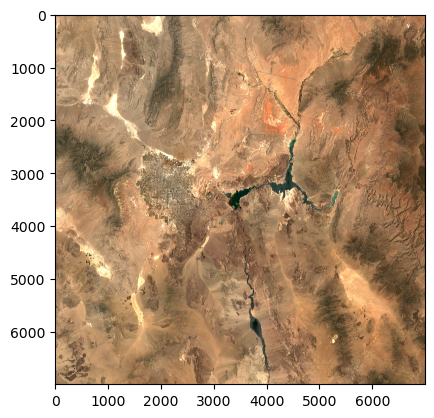

In [69]:
plt.imshow(np.squeeze(img)*3e-4)

In [70]:
with rasterio.open(b03_data[0]) as ds:
    profile = ds.profile

In [71]:
img.shape

(6994, 6992, 3)

In [72]:
mosaic_profile = profile.copy()
mosaic_profile.update({'count':3, 'width':img.shape[1], 'height':img.shape[0], 'transform':b02_transform})

In [73]:
with rasterio.open('../data/hls/new/new/2022185/hls_mosaic.tif', 'w', **mosaic_profile) as ds:
    ds.write(img.transpose([2, 0, 1]))